# Precipitation Change in the last 15 years over the CONUS

## Introduction and data manipulation

In [26]:
# This is an overview on how we can use Python and developed libraries for geospatial analysis.
# I will use Python to gather the data from publicly available sources and analyze them to
# show how we can get valuable information from data. Also, different visualization tools are used
# for this purpose. The focus of this work in on climate and weather data!

# If you think climate extreme events are not very important, please see here: 
# https://www.ncei.noaa.gov/access/billions/


# Xarray is a powerful library for working with multi-dimentional datasets. In GeoSpatial field,
# most of data are multi-dimentional (more than 3). For example, we have lon and lat (or x and y)
# and elevation (or z) and other attributes for that location, such as temperature (min, max, ave)
#,time, and precipitation based on different observations and/or model predictions.
# Read more about this library here: https://xarray.dev/

# Let's get started!

#Installing Xarray in jupyter
#! conda install -c conda-forge xarray dask netCDF4 bottleneck
#Please note this can take a few minutes. In my laptop, it took more than 15 minutes!!

In [243]:
#Importing required data analysis (~general)libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing libraries for eading url and Xarray for working with the data
import glob
import urllib.request
import xarray as xr

In [244]:
for yr in range(2007,2022): # note that in python, the end range is not inclusive. So, in this case data for 2015 is not downloaded.
    url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
    savename = url.split('/')[-1]
    urllib.request.urlretrieve(url,savename)

In [474]:
# Now want to join these files together and create one file for simplicity of work in the future
# The data in these files are daily precipitation data for different place. So, the location
# and time are common in all files.

Prec_USA = xr.open_mfdataset('precip.V1.0.*.nc', concat_dim='time', combine='nested')
Prec_USA_Yr = Prec_USA.groupby('time.year').sum()


# Read more about how this works here: https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html

# Visualization

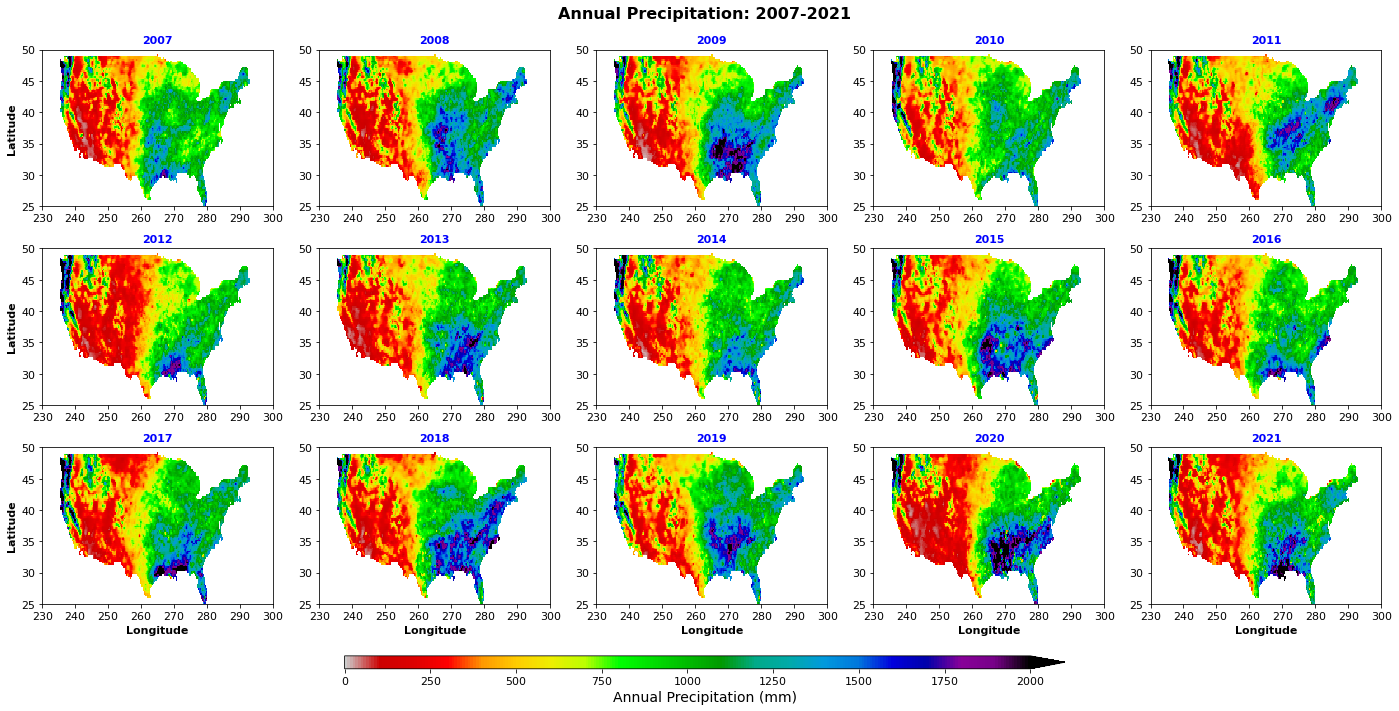

In [478]:
landmask = Prec_USA_Yr.precip.sum(dim='year')>0
fig = plt.figure(figsize=[20,10], facecolor='w')

plt.subplots_adjust(bottom=0.15, top=0.92, left=0.04, right=.97, 
                     wspace=0.2, hspace=0.27)
nrows = 3
ncols = 5

fig.suptitle("Annual Precipitation: 2007-2021", fontsize=16, y=.98,fontweight = 'bold', color = 'black')

for i in range(1, 16):
    plt.subplot(nrows, ncols, i)
    dataplot = Prec_USA_Yr.precip[i-1, :, :].where(landmask)
    p = plt.pcolormesh(Prec_USA_Yr.lon, Prec_USA_Yr.lat, dataplot,
                   vmax = 2000, vmin = 0, cmap = 'nipy_spectral_r', shading='auto'    
                      ) 

    plt.xlim([230,300])
    plt.ylim([25,50])
    plt.title(2006+i, fontsize = 11, 
              fontweight = 'bold', color = 'b')  
 
    
    
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: 
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1):
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')
        
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Annual Precipitation (mm)', color = 'k', size=14)
plt.savefig('Annual Precipitation.png', format = 'png', dpi = 400)      
        
        